# Twitter Sentiment Analysis



# Introduction

The objective is to use machine learning techniques for the evaluation and prediction of 'Twitter Sentiment' dataset. The dataset comprises tweets related to the airline industry and user experiences. The preprocessing of Twitter text input and the conversion of the target variable to integers were integral steps. Shallow machine learning approaches involved the application of Naive Bayes, Random Forest Classifier, SVM and XGB Classifier. Additionally, deep learning methods namely LSTM and Convolutional Neural Network were used in the analysis. The dataset undergoes fitting with diverse machine learning models and their performances are analyzed to identify the most effective model demonstrating significantly higher accuracy.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from numpy import array
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.svm import LinearSVC
from nltk.stem import wordnet
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
from wordcloud import WordCloud
!pip install contractions
import contractions
!pip install tensorflow
!pip install Keras-Preprocessing
!pip install --upgrade tpot
from tpot import TPOTClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from keras.utils import to_categorical
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from numpy import asarray
from numpy import zeros
from prettytable import PrettyTable
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv ("/content/drive/MyDrive/Twitter Sentiment Analysis/Tweets_train.csv")
df_test = pd.read_csv ("/content/drive/MyDrive/Twitter Sentiment Analysis/Tweets_test.csv", encoding="latin-1")
df_validation = pd.read_csv ("/content/drive/MyDrive/Twitter Sentiment Analysis/Tweets_dev.csv")

#Exploratory Data Analysis

The dataset includes tweets and tweet IDs as feature variables with the target variable being the airline sentiment categorized into three classes: Positive, Negative, and Neutral.

In [ ]:
# Display basic information about the datasets
print("Training Dataset Info:")
print(df_train.info())
print("\nTest Dataset Info:")
print(df_test.info())
print("\nValidation Dataset Info:")
print(df_validation.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11858 non-null  int64 
 1   text               11858 non-null  object
 2   airline_sentiment  11858 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1464 non-null   int64 
 1   text               1464 non-null   object
 2   airline_sentiment  1464 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.4+ KB
None

Validation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 3 columns):
 #   Column             Non-

In [ ]:
df_train.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


The tweet id column was dropped because it only included float numbers and was not relevant to the analysis.

In [ ]:
# Dropping the Tweet_id column
df_train = df_train.drop(['tweet_id'],axis=1)
df_test = df_test.drop(["tweet_id"],axis=1)
df_validation = df_validation.drop(["tweet_id"],axis=1)

It can be observed that there are no missing or Null values present in any columns of the dataset.

In [ ]:
# Check for missing values
print("\nMissing Values in Training Dataset:")
print(df_train.isnull().sum())
print("\nMissing Values in Test Dataset:")
print(df_test.isnull().sum())
print("\nMissing Values in Validation Dataset:")
print(df_validation.isnull().sum())


Missing Values in Training Dataset:
text                 0
airline_sentiment    0
dtype: int64

Missing Values in Test Dataset:
text                 0
airline_sentiment    0
dtype: int64

Missing Values in Validation Dataset:
text                 0
airline_sentiment    0
dtype: int64


In the training dataset, the distribution of sentiment classes reveals varying proportions with 7434 samples labeled as "Negative", 2510 as "Neutral" and 1914 as "Positive." This indicates a relatively higher prevalence of negative sentiments compared to neutral and positive sentiments. Negative sentiments constitute the largest proportion accounting for approximately 62.7% of the samples. Neutral sentiments represent about 21.2%, while Positive sentiments make up around 16.1% of the dataset. It can be noted that the proportion of sentiments is consistent across the testing and validation datasets.

In [ ]:
# Create dataframes with sentiment class counts
train_counts = df_train['airline_sentiment'].value_counts().reset_index()
train_counts.columns = ['Sentiment', 'Train Count']

test_counts = df_test['airline_sentiment'].value_counts().reset_index()
test_counts.columns = ['Sentiment', 'Test Count']

validation_counts = df_validation['airline_sentiment'].value_counts().reset_index()
validation_counts.columns = ['Sentiment', 'Validation Count']

# Merge dataframes on 'Sentiment' column
merged_counts = pd.merge(train_counts, test_counts, on='Sentiment', how='outer')
merged_counts = pd.merge(merged_counts, validation_counts, on='Sentiment', how='outer')

# Display the table
print("Count of Each Sentiment Class in Train, Test, and Validation Data:")
merged_counts

Count of Each Sentiment Class in Train, Test, and Validation Data:


,Sentiment,Train Count,Test Count,Validation Count
0,negative,7434,918,826
1,neutral,2510,310,279
2,positive,1914,236,213


In [ ]:
# Visualize class distribution in the training dataset using a pie chart
fig = px.pie(df_train, names='airline_sentiment', title ='Class Distribution in Training Dataset')
fig.show()

In [ ]:
# Visualize class distribution in the test dataset using a pie chart
fig = px.pie(df_test, names='airline_sentiment', title ='Class Distribution in Test Dataset')
fig.show()

In [ ]:
# Visualize class distribution in the validation dataset using a pie chart
fig = px.pie(df_validation, names='airline_sentiment', title ='Class Distribution in Validation Dataset')
fig.show()

The Word Cloud visually depicts the most frequent words in Positive, Negative, and Neutral tweets.

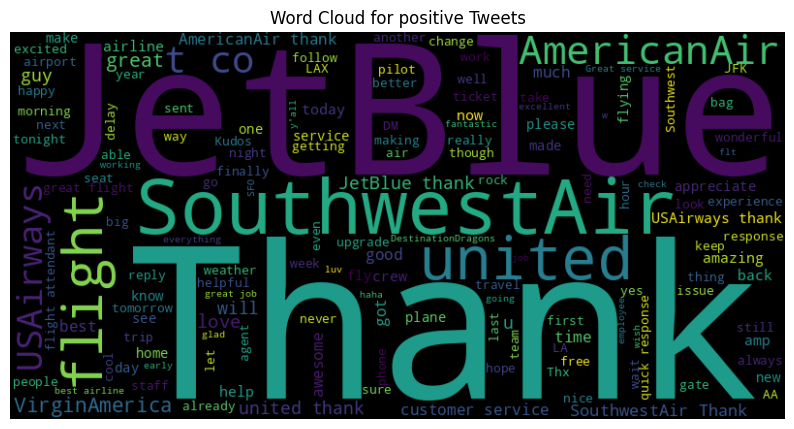

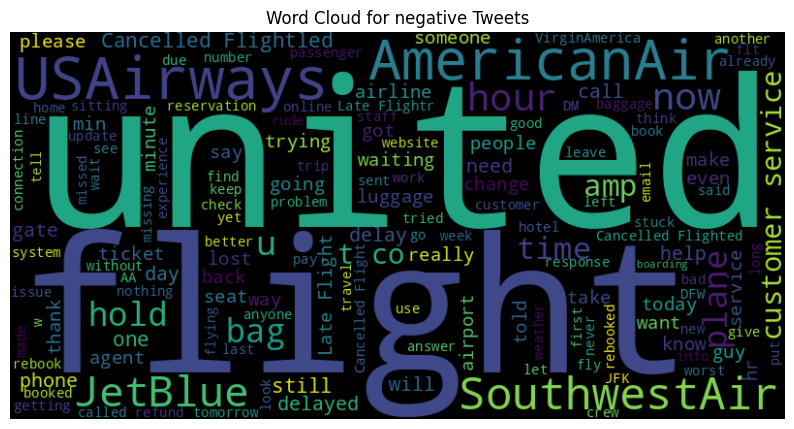

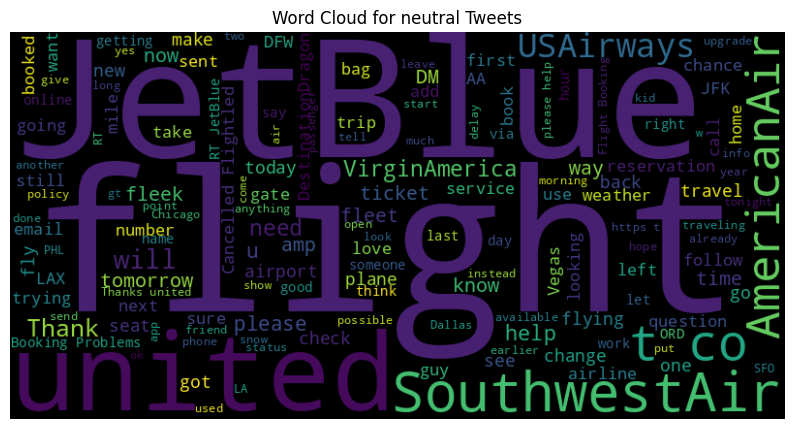

In [ ]:
# Visualize word cloud for each sentiment
def generate_wordcloud(sentiment):
    tweets = ' '.join(df_train[df_train['airline_sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=150).generate(tweets)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()

for sentiment in df_train['airline_sentiment'].unique():
    generate_wordcloud(sentiment)

# Data Pre-processing

Directly inputting natural language text data into the machine learning model can impact its accuracy. Therefore, the data is pre-processed using various techniques for effective cleaning. The categorical labels representing the sentiment (Negative, Neutral, Positive) in the target variable are transformed into integer values (0, 1, 2). A function is defined for preprocessing where the text is converted to lowercase, contractions are expanded and stopwords are removed. Twitter handles, punctuations and URL/website links are removed using Regex functionality. Additionally, the text undergoes tokenization and lemmatization of the tokens. Tokenization is used to segment the text into a sequence of tokens. Following tokenization, lemmatization is performed using the WordNet lemmatizer. Lemmatization involves reducing words to their base or root form. This not only reduces the dimensionality of the text data but also provides a more standardized textual dataset.

In [ ]:
#Converting the String Negative, Neutral and Positive into integer values of 0, 1, 2 respectively
df_train["airline_sentiment"] = pd.Categorical(df_train["airline_sentiment"]).codes
df_test["airline_sentiment"] = pd.Categorical(df_test["airline_sentiment"]).codes
df_validation["airline_sentiment"] = pd.Categorical(df_validation["airline_sentiment"]).codes

In [ ]:
# Load the stopwords
stop_words = set(stopwords.words('english'))

#Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Expand contractions
    text = contractions.fix(text)

    # Remove Twitter handles
    text = re.sub(r'@[\w]+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove URL/website links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Tokenize and lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove stopwords
    text = ' '.join([word for word in tokens if word.lower() not in stop_words])

    return text

# Apply the preprocessing function to the 'text' column in each dataset
df_train['text'] = df_train['text'].apply(preprocess_text)
df_test['text'] = df_test['text'].apply(preprocess_text)
df_validation['text'] = df_validation['text'].apply(preprocess_text)

df_train

,text,airline_sentiment
0,good thank,2
1,way ruin vacation brother ha called night mult...,0
2,yes thankfully catering got loading frustrated...,2
3,automated message helpful impossible speak hum...,0
4,makingloveoutofnothingatall brandloveaffair lax,2
...,...,...
11853,help u phone gate checkin book travel client b...,0
11854,ha worst customer service line called 8 time t...,0
11855,grade trip flight timeliness cancelled flighta...,0
11856,thanks vague canned response doe address issue,0


TF-IDF vectorizer is used which is responsible for transforming the raw text data into numerical features that can be used by a machine learning model. The TF-IDF vectorizer generates a vectorized representation of each document, highlighting distinctive and meaningful terms while considering their rarity across the entire dataset.

In [ ]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
X_validation = vectorizer.transform(df_validation['text'])

y_train = df_train["airline_sentiment"]
y_test = df_test["airline_sentiment"]
y_validation = df_validation["airline_sentiment"]

# Pre-processing for Deep Learning Models

As machine learning algorithms operate with numerical data, the process of data cleansing frequently involves converting textual information into numerical form. The GLOVE model is used for this conversion. The initial step involves tokenizing the text data using the Keras Tokenizer function which segments a given text into individual words. To address the potential balancing issue, the individual words are subsequently padded. This padding ensures that each word is represented by a vector of 100 characters. In cases where a word has fewer than 100 characters, the padding involves appending '0's to reach the desired length indicating empty characters. The pad_sequences function from the Keras library is employed for this task.

In [ ]:
# Tokenize the words
word_tokenizer = Tokenizer(num_words=1000, lower=True)
word_tokenizer.fit_on_texts(df_train['text'])

# Convert text to sequences
X_traintoken = word_tokenizer.texts_to_sequences(df_train['text'])
X_testtoken = word_tokenizer.texts_to_sequences(df_test['text'])

# Determine the maximum number of tokens
max_tokens = len(word_tokenizer.word_index) + 1
max_tokens

12006

In [ ]:
maxlen = 100

# Padding the tokenized sequences
X_trainpad = pad_sequences(X_traintoken, padding='post', maxlen=maxlen)
X_testpad = pad_sequences(X_testtoken, padding='post', maxlen=maxlen)

The GloVe file is imported which contains the vectors for each word. When tokenized words from the dataset match entries in the GLOVE file, the corresponding vector data from GLOVE replaces the original words in the dataset.

In [ ]:
# Pre-trained Word embedding using Glove

# Initialize an empty dictionary to store word embeddings
embeddings_dict = {}

# Open the GloVe word vectors file
with open("/content/drive/MyDrive/Twitter Sentiment Analysis/glove.6B.100d.txt", 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_dict[word] = vector
    f.close()
print('Found %s word vectors.' %len(embeddings_dict))

Found 400000 word vectors.


In [ ]:
# Prepare embedding matrix
embedding_dim = 100

embedding_matrix=np.zeros((max_tokens,embedding_dim))
for word,i in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

EmbeddingMatrix = pd.DataFrame(embedding_matrix)

In [ ]:
# Load the pre-trained word embeddings matrix into an Embedding layer.

embedding_layer = Embedding(max_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable = False)

# Model Training

## 1. Naive bayes

The Naive Bayes classifier is a probabilistic machine learning algorithm based on Bayes' theorem which calculates the probability of a particular class given the observed features. During training, it learns the probabilities of features occurring in each class and for prediction, it calculates the conditional probability of each class based on observed features.

Initially, the model is trained using the training data which is vectorized using a TF-IDF vectorizer. Hyperparameter tuning is performed on validation data using GridSearchCV, exploring different configurations of the smoothing parameter 'alpha' to find the optimal value. The model is subsequently retrained using the best parameter that yields the highest performance. The final tuned model is then evaluated on a separate test set. The model achieved a good accuracy of 76%.



Confusion Matrix:
 [[885 174 105]
 [ 27 116  22]
 [  6  20 109]]

Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       918
           1       0.70      0.37      0.49       310
           2       0.81      0.46      0.59       236

    accuracy                           0.76      1464
   macro avg       0.76      0.60      0.64      1464
weighted avg       0.76      0.76      0.73      1464

Test Accuracy: 0.7581967213114754




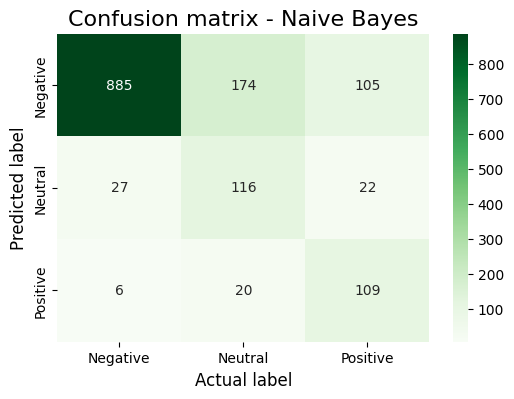

In [ ]:
# Naive Bayes Model

#Applying the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Hyperparameter Tuning using GridSearchCV on Validation data
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring="f1", verbose=0, n_jobs=4)
grid_search.fit(X_validation, y_validation)

best_params = grid_search.best_params_

# Using the best parameters to create a new model
best_nb_model = MultinomialNB(alpha=best_params['alpha'])
best_nb_model.fit(X_train, y_train)

# Model Evaluation on the Test Set
y_pred_test_nb = best_nb_model.predict(X_test)

# Print results for the test dataset
print('Confusion Matrix:\n', confusion_matrix(y_pred_test_nb, y_test))
print('\nReport:\n', classification_report(y_test, y_pred_test_nb))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test_nb))
print('\n')

# Plot Confusion Matrix
conf_matrix_nb = confusion_matrix(y_pred_test_nb, y_test)
sentiment_classes_nb = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, cmap=plt.cm.Greens, annot=True, fmt='d',
            xticklabels=sentiment_classes_nb,
            yticklabels=sentiment_classes_nb)
plt.title('Confusion matrix - Naive Bayes', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

## 2. Random Forest

Random Forest is an ensemble learning approach wherein the outcomes of numerous decision trees are taken into account to label a particular sample. The initial step involves training the model with the training data, which undergoes vectorization using a TF-IDF vectorizer. Hyperparameter tuning is conducted on the validation data using GridSearchCV, exploring various configurations of the number of estimators representing the count of decision trees that run in parallel and whose results are aggregated to predict class labels. Following this, the model is retrained using the optimal parameter that maximizes performance. The ultimately fine-tuned model is then assessed on the test set. The model attained a relatively high accuracy of 76% with notable precision and recall scores particularly for the dominant class.



Test Data Accuracy

Confusion Matrix: 
 [[849 138  87]
 [ 55 132  19]
 [ 14  40 130]]
Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       918
           1       0.64      0.43      0.51       310
           2       0.71      0.55      0.62       236

    accuracy                           0.76      1464
   macro avg       0.71      0.63      0.66      1464
weighted avg       0.75      0.76      0.74      1464

Accuracy:  0.7588797814207651




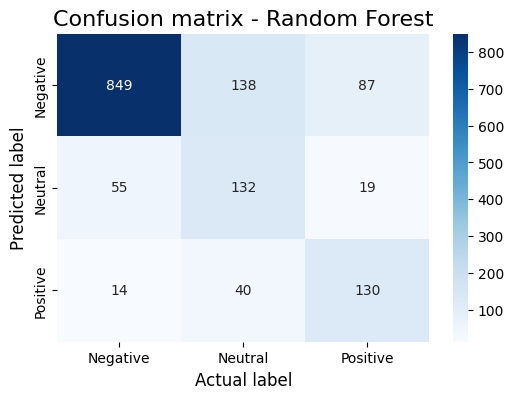

In [ ]:
# Random Forest Classifier

# Instantiate the RandomForestClassifier and fitting the model using the training set
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Hyperparameter Tuning on the Validation Set
param_grid = dict(n_estimators = [100, 200, 500])
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring="f1", verbose=0, n_jobs=4)
grid_search.fit(X_validation, y_validation)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new RandomForestClassifier
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(X_train, y_train)

# Evaluation on the Test Set
y_test_pred_best_rf = best_random_forest.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_best_rf, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_best_rf))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_best_rf))
print('\n')

# Plot Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test_pred_best_rf, y_test)
sentiment_classes_nb = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes_nb,
            yticklabels=sentiment_classes_nb)
plt.title('Confusion matrix - Random Forest', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

## 3. Support Vector Machine

Support Vector Machine is a supervised machine learning model used for classification tasks. It works by finding a hyperplane in a high-dimensional space that best separates data points of different classes. SVM aims to maximize the margin between classes, where the margin is the distance between the hyperplane and the nearest data points of each class.

The model is initially trained with the training data. Hyperparameter tuning involves systematically evaluating different options for the regularization parameter 'C' and kernel types using the Grid Search technique. The evaluation is conducted through a 5-fold cross-validation approach. The best hyperparameters from the grid search are used for retraining the model which is then evaluated on the test set. The model achieved a 70% accuracy score.

Test Data Accuracy

Confusion Matrix: 
 [[907 267 139]
 [  3  26   0]
 [  8  17  97]]
Report:
               precision    recall  f1-score   support

           0       0.69      0.99      0.81       918
           1       0.90      0.08      0.15       310
           2       0.80      0.41      0.54       236

    accuracy                           0.70      1464
   macro avg       0.79      0.49      0.50      1464
weighted avg       0.75      0.70      0.63      1464

Accuracy:  0.703551912568306




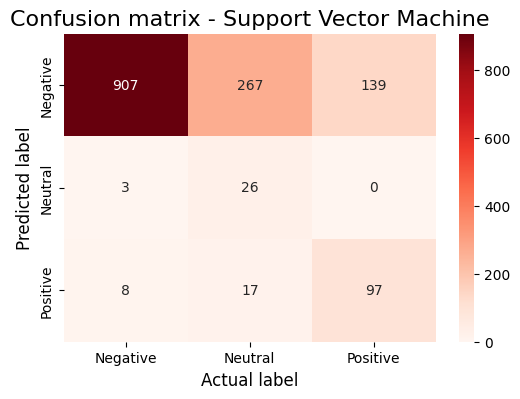

In [ ]:
# Support Vector Machine

# Instantiate the SVC and fitting the model using the training set
svc = SVC()
svc.fit(X_train, y_train)

# Hyperparameter Tuning on the Validation Set
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring="f1", verbose=0, n_jobs=4)
grid_search.fit(X_validation, y_validation)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new SVC
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

# Evaluation on the Test Set
y_test_pred_best_svm = best_svc.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_best_svm, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_best_svm))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_best_svm))
print('\n')

# Plot Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test_pred_best_svm, y_test)
sentiment_classes_nb = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, cmap=plt.cm.Reds, annot=True, fmt='d',
            xticklabels=sentiment_classes_nb,
            yticklabels=sentiment_classes_nb)
plt.title('Confusion matrix - Support Vector Machine', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

## 4. XGB Classifier

XGBoost is a powerful ensemble learning algorithm that combines the strengths of decision trees to boost predictive performance. In multi-class classification problems, XGBoost extends its capability by employing a one-vs-all strategy, training multiple decision trees to distinguish each class from the rest. The algorithm iteratively refines the model, optimizing a weighted sum of classification errors to enhance overall predictive accuracy across multiple classes. Hyperparameter tuning is performed using GridSearchCV using different configurations of learning rate, no of estimators and max depth on the validation dataset. The model achieved a good accuracy score of 71%.

Test Data Accuracy

Confusion Matrix: 
 [[889 249 111]
 [  3  28   1]
 [ 26  33 124]]
Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       918
           1       0.88      0.09      0.16       310
           2       0.68      0.53      0.59       236

    accuracy                           0.71      1464
   macro avg       0.75      0.53      0.53      1464
weighted avg       0.74      0.71      0.64      1464

Accuracy:  0.7110655737704918




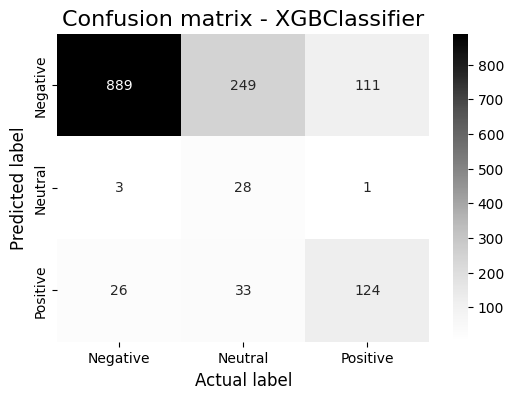

In [ ]:
# XGBClassifier

# Instantiate the XGBClassifier and fitting the model using the training set
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Hyperparameter Tuning on the Validation Set
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 200, 500],
              'max_depth': [3, 5, 7]}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring="f1", verbose=0, n_jobs=4)
grid_search.fit(X_validation, y_validation)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new XGBClassifier
best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Evaluation on the Test Set
y_test_pred_best_xgb = best_xgb_classifier.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_best_xgb, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_best_xgb))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_best_xgb))
print('\n')

# Plot Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test_pred_best_xgb, y_test)
sentiment_classes_nb = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, cmap=plt.cm.Greys, annot=True, fmt='d',
            xticklabels=sentiment_classes_nb,
            yticklabels=sentiment_classes_nb)
plt.title('Confusion matrix - XGBClassifier', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# Deep Learning Models

Deep learning models involve neural networks with multiple layers to process and learn intricate patterns from data. Deep learning is a methodology that sequentially learns categories through its hidden layer architecture. It starts with low-level categories such as letters, progresses to slightly higher-level categories like words, and finally addresses higher-level categories like sentences. Each neuron or node in the network represents a component of the entire network, and when integrated, they collectively form a comprehensive representation of the data.

The deep learning models used here utilize a sequential architecture where the output of one layer is fed directly into the subsequent layer. Following this sequence, the embedding layer is introduced containing the specifications of the input data. The Embedding layer accommodates input data with a maximum word length of 100 which is achieved through padding. The input to the model includes the complete data after GloVe encoding along with the comprehensive vector matrix generated by the GloVe encoding model.

## 5. Convolutional Neural Network (CNN)

Convolutional Neural Network is a deep learning model which excels in capturing local patterns and hierarchical representations in sequential data. Convolutional layers with varying kernel sizes and max pooling are applied to capture local patterns in the sequential data. Subsequently, dense layers including a dropout layer for regularization are added to facilitate learning hierarchical representations. One-hot encoding is performed on the categorical target variables. The CNN is trained on the training data with a batch size of 128 and for six epochs. The model is then evaluated on the test set. The architecture and parameters are summarized using the model.summary() function.
The model attained a good accuracy of 74%.



In [ ]:
# Convolutional Neural Network (CNN)

# Create a Sequential model
model = Sequential()

# Embedding layer with pre-trained word embeddings
model.add(Embedding(max_tokens, embedding_dim, weights=[EmbeddingMatrix], input_length=maxlen, trainable=False))

# Convolutional layers with max pooling
filters = 128
kernel_sizes = [3, 4, 5]

for kernel_size in kernel_sizes:
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# One-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Fit the model
Cnn_history = model.fit(X_trainpad, y_train_one_hot, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
Cnn_Score = model.evaluate(X_testpad, y_test_one_hot, verbose=1)

# Make predictions on the test set
CNN_Predict_probs = model.predict(X_testpad)
CNN_Predict = np.argmax(CNN_Predict_probs, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1200600   
                                                                 
 conv1d (Conv1D)             (None, 98, 128)           38528     
                                                                 
 conv1d_1 (Conv1D)           (None, 95, 128)           65664     
                                                                 
 conv1d_2 (Conv1D)           (None, 91, 128)           82048     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                        

Test Accuracy: 0.7418032786885246

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       918
           1       0.59      0.37      0.46       310
           2       0.72      0.55      0.62       236

    accuracy                           0.74      1464
   macro avg       0.69      0.61      0.64      1464
weighted avg       0.73      0.74      0.72      1464





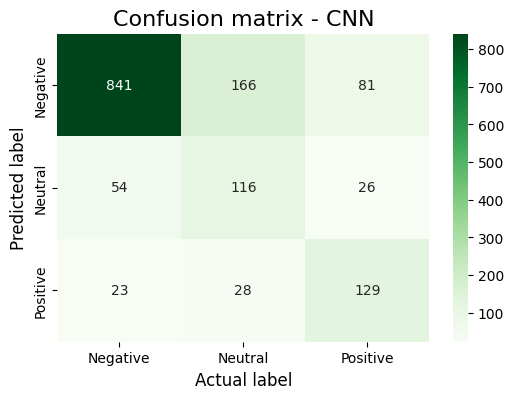

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=1), CNN_Predict)
print('Test Accuracy:', accuracy)

# Print classification report
print('\nClassification Report:\n', classification_report(np.argmax(y_test_one_hot, axis=1), CNN_Predict))
print('\n')

# Plot Confusion Matrix
conf_matrix_nb = confusion_matrix(CNN_Predict, np.argmax(y_test_one_hot, axis=1))
sentiment_classes_nb = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, cmap=plt.cm.Greens, annot=True, fmt='d',
            xticklabels=sentiment_classes_nb,
            yticklabels=sentiment_classes_nb)
plt.title('Confusion matrix - CNN', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

## 6. Long short-term memory (LSTM)

Long Short-Term Memory is a type of recurrent neural network (RNN) architecture designed to address the challenges of capturing and preserving long-term dependencies in sequential data. The LSTM neural network is implemented here using the Keras Sequential model. The model begins with an Embedding layer, incorporating pre-trained word embeddings from GloVe. Two LSTM layers with 128 units each are introduced to capture long-range dependencies and sequential patterns in the input data. Following the LSTM layers, dense layers with ReLU activation and dropout regularization are added to facilitate hierarchical learning. The model attained a good accuracy of 74%.

In [ ]:
# LSTM

# Create a Sequential model
lstm_model = Sequential()

# Embedding layer with pre-trained word embeddings
lstm_model.add(Embedding(max_tokens, embedding_dim, weights=[EmbeddingMatrix], input_length=maxlen, trainable=False))

# LSTM layers
units = 128
lstm_model.add(LSTM(units, return_sequences=True))
lstm_model.add(LSTM(units))

# Dense layers
lstm_model.add(Dense(256, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
lstm_model.summary()

# Fit the model
lstm_history = lstm_model.fit(X_trainpad, y_train_one_hot, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
lstm_Score = lstm_model.evaluate(X_testpad, y_test_one_hot, verbose=1)

# Make predictions on the test set
lstm_Predict_probs = model.predict(X_testpad)
lstm_Predict = np.argmax(lstm_Predict_probs, axis=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1200600   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1483227 (5.66 MB)
Trainable params: 2826

Test Accuracy: 0.7418032786885246

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       918
           1       0.59      0.37      0.46       310
           2       0.72      0.55      0.62       236

    accuracy                           0.74      1464
   macro avg       0.69      0.61      0.64      1464
weighted avg       0.73      0.74      0.72      1464





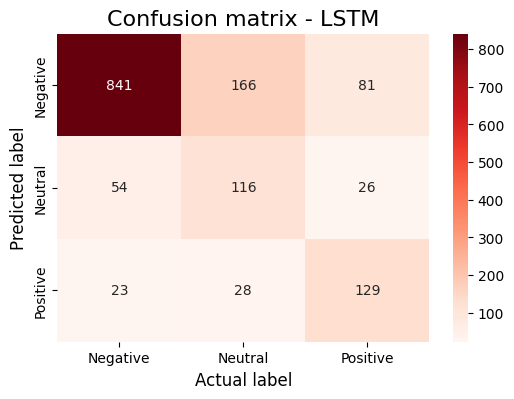

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=1), lstm_Predict)
print('Test Accuracy:', accuracy)

# Print classification report
print('\nClassification Report:\n', classification_report(np.argmax(y_test_one_hot, axis=1), lstm_Predict))
print('\n')

# Plot Confusion Matrix
conf_matrix_nb = confusion_matrix(lstm_Predict, np.argmax(y_test_one_hot, axis=1))
sentiment_classes_nb = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, cmap=plt.cm.Reds, annot=True, fmt='d',
            xticklabels=sentiment_classes_nb,
            yticklabels=sentiment_classes_nb)
plt.title('Confusion matrix - LSTM', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# Conclusion





In comparing the performance of various models, Naive Bayes and Random Forest models exhibit similar and relatively high F1 measures of 0.7582 and 0.7589 respectively. The SVM Classifier and XGB Classifier slightly lag behind with F1 measures of 0.7036 and 0.7111 respectively. Moving into deep learning models, both the Convolutional Neural Network and the LSTM Model demonstrate comparable F1 measures of 0.7418. I prefer the Random Forest model over the other models because of its high accuracy, precision and recall scores.

The table below presents a comparison of F1 measures for all implemented models:

In [ ]:
# Implementing comparison table for all models using PrettyTable function
Model_comparison_table = PrettyTable()
print("Model Performance Comparison:")
Model_comparison_table.field_names = ["Models", "F1 Measure"]

def format_background_color(text, color_code):
    return f"\033[48;5;{color_code}m{text}\033[0m"
background_color_code = 42

Model_comparison_table.add_row(["Naive Bayes", round(f1_score(y_test, y_pred_test_nb, average='micro'), 4)])
Model_comparison_table.add_row([format_background_color("Random Forest", background_color_code),
                                round(f1_score(y_test, y_test_pred_best_rf, average='micro'), 4)])
Model_comparison_table.add_row(["SVM Classifier", round(f1_score(y_test, y_test_pred_best_svm, average='micro'), 4)])
Model_comparison_table.add_row(["XGB Classifier", round(f1_score(y_test, y_test_pred_best_xgb, average='micro'), 4)])
Model_comparison_table.add_row(["Convolutional Neural Network (CNN)", round(f1_score(np.argmax(y_test_one_hot, axis=1), CNN_Predict, average='micro'), 4)])
Model_comparison_table.add_row(["LSTM Model", round(f1_score(np.argmax(y_test_one_hot, axis=1), lstm_Predict, average='micro'), 4)])

print(Model_comparison_table)

Model Performance Comparison:
+------------------------------------+------------+
|               Models               | F1 Measure |
+------------------------------------+------------+
|            Naive Bayes             |   0.7582   |
|           Random Forest            |   0.7589   |
|           SVM Classifier           |   0.7036   |
|           XGB Classifier           |   0.7111   |
| Convolutional Neural Network (CNN) |   0.7418   |
|             LSTM Model             |   0.7418   |
+------------------------------------+------------+
